In [1]:
# Import essential Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # Commented out because missingno is not installed

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, f1_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay
)

## 🔍 Exploratory Data Analysis (EDA)
Let's explore the dataset to understand patterns, detect outliers, and visualize distributions.

In [2]:
# see scripts/data_collection.py for the collection of data
# see scripts/data_preprocessing.py for preparing the data

In [3]:
# collected data from OpenWietherMap
df = pd.read_csv("../data/air_quality_data.csv")
df.head(2000)

,city,timestamp,pm2.5,aqi,temperature,humidity,pressure,wind_speed
0,Casablanca,2025-06-14 05:23:17,6.81,2,21.66,73,1018,2.24
1,Rabat,2025-06-14 05:23:17,6.07,2,18.37,100,1017,0.00
2,Marrakech,2025-06-14 05:23:18,11.82,2,19.98,73,1017,2.06
3,Casablanca,2025-06-14 06:28:21,6.90,2,20.09,84,1018,2.99
4,Rabat,2025-06-14 06:28:22,6.08,2,18.37,94,1017,0.00
...,...,...,...,...,...,...,...,...
241,Rabat,2025-06-16 11:11:32,10.22,2,24.37,83,1015,0.00
242,Marrakech,2025-06-16 11:11:32,23.69,3,23.98,64,1016,1.03
243,Casablanca,2025-06-16 11:31:11,13.86,2,25.00,69,1016,1.54
244,Rabat,2025-06-16 11:31:11,14.08,2,24.35,78,1015,2.06


In [4]:
# collected data from OpenWietherMap
df = pd.read_csv("../data/preprocessed_data.csv")
df.head(2000)

,timestamp,pm2.5,aqi,temperature,humidity,pressure,wind_speed,city_Casablanca,city_Marrakech,city_Rabat,aqi_class
0,2025-06-14 05:23:17,-0.886360,-0.953347,-0.882784,0.329858,0.916908,-0.360948,True,False,False,Good
1,2025-06-14 05:23:17,-1.055573,-0.953347,-1.793020,2.065923,0.379862,-2.408477,False,False,True,Good
2,2025-06-14 05:23:18,0.259257,-0.953347,-1.347585,0.329858,0.379862,-0.525482,False,True,False,Good
3,2025-06-14 06:28:21,-0.865780,-0.953347,-1.317152,1.037144,0.916908,0.324608,True,False,False,Good
4,2025-06-14 06:28:22,-1.053286,-0.953347,-1.793020,1.680131,0.379862,-2.408477,False,False,True,Good
...,...,...,...,...,...,...,...,...,...,...,...
241,2025-06-16 11:11:32,-0.106609,-0.953347,-0.133014,0.972845,-0.694230,-2.408477,False,False,True,Good
242,2025-06-16 11:11:32,2.973524,0.984863,-0.240915,-0.248831,-0.157184,-1.466980,False,True,False,Good
243,2025-06-16 11:31:11,0.725736,-0.953347,0.041286,0.072663,-0.157184,-1.000801,True,False,False,Good
244,2025-06-16 11:31:11,0.776043,-0.953347,-0.138548,0.651351,-0.694230,-0.525482,False,False,True,Good


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


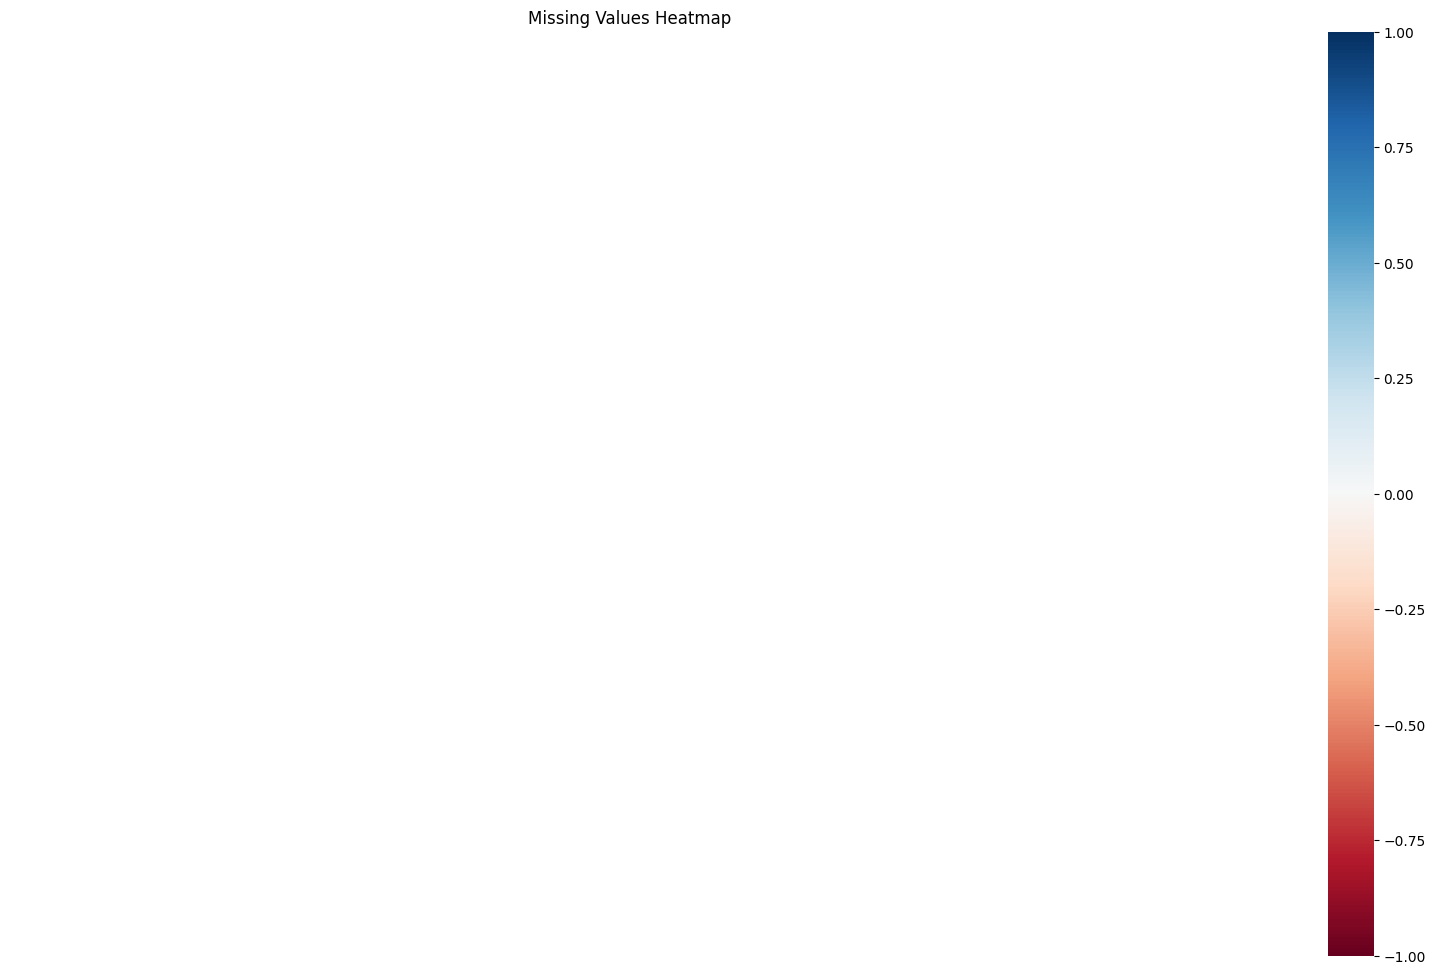

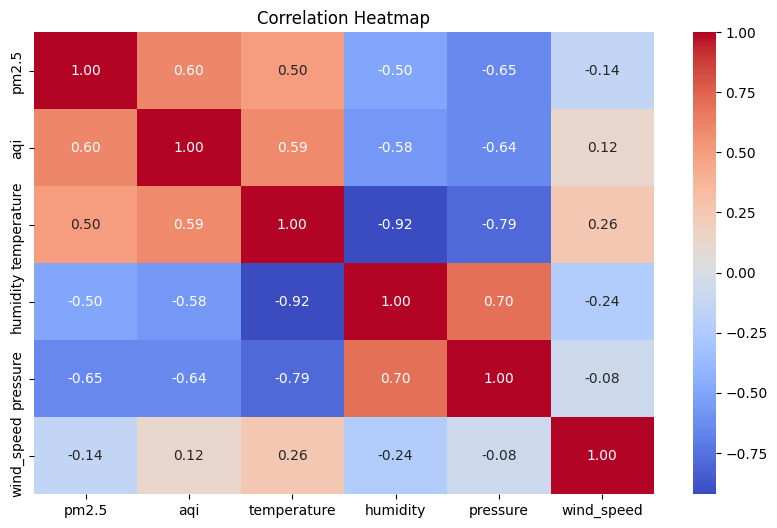

In [5]:
# Show missing data heatmap
msno.heatmap(df)
plt.title("Missing Values Heatmap")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

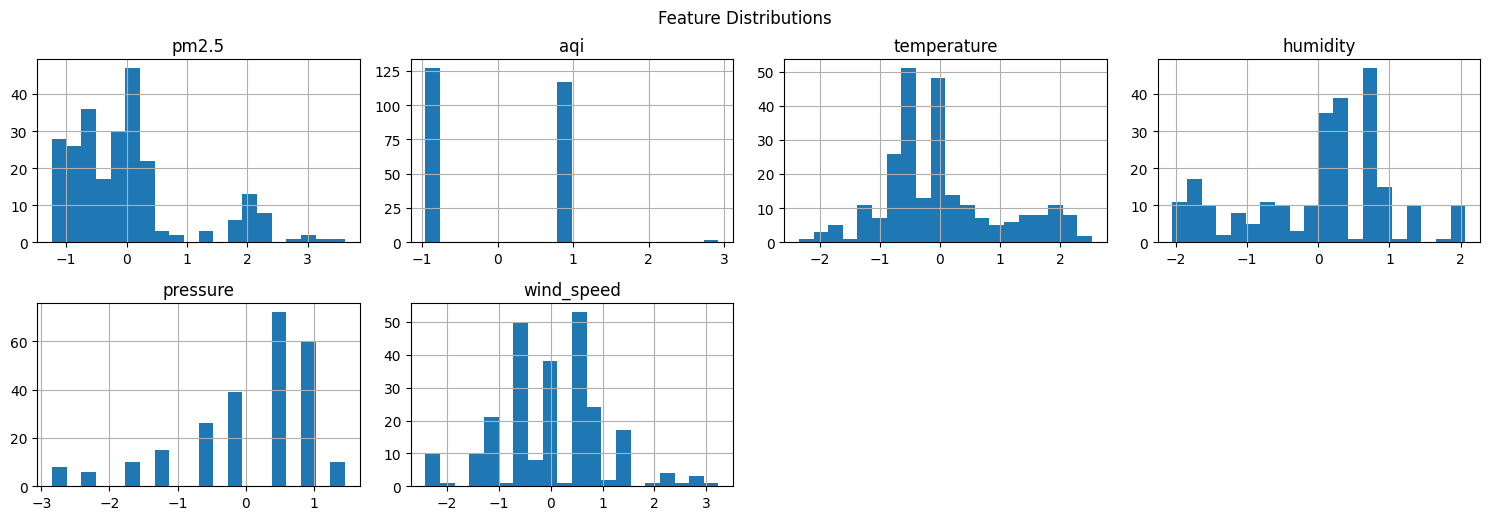

In [6]:

# Plot distribution of selected features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(4, 4))
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()


In [7]:
# Load the preprocessed dataset 
df = pd.read_csv("../data/preprocessed_data.csv")

# Preview the data
df.head()


,timestamp,pm2.5,aqi,temperature,humidity,pressure,wind_speed,city_Casablanca,city_Marrakech,city_Rabat,aqi_class
0,2025-06-14 05:23:17,-0.886360,-0.953347,-0.882784,0.329858,0.916908,-0.360948,True,False,False,Good
1,2025-06-14 05:23:17,-1.055573,-0.953347,-1.793020,2.065923,0.379862,-2.408477,False,False,True,Good
2,2025-06-14 05:23:18,0.259257,-0.953347,-1.347585,0.329858,0.379862,-0.525482,False,True,False,Good
3,2025-06-14 06:28:21,-0.865780,-0.953347,-1.317152,1.037144,0.916908,0.324608,True,False,False,Good
4,2025-06-14 06:28:22,-1.053286,-0.953347,-1.793020,1.680131,0.379862,-2.408477,False,False,True,Good


In [8]:
# Drop unnecessary columns if present
df = df.drop(columns=["timestamp", "aqi_class"], errors="ignore")

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Show target columns for regression and classification
df[["pm2.5", "aqi"]].describe()


Missing values per column:
pm2.5              0
aqi                0
temperature        0
humidity           0
pressure           0
wind_speed         0
city_Casablanca    0
city_Marrakech     0
city_Rabat         0
dtype: int64


,pm2.5,aqi
count,2.460000e+02,2.460000e+02
mean,1.733031e-16,5.199093e-16
std,1.002039e+00,1.002039e+00
min,-1.233932e+00,-9.533472e-01
25%,-6.988538e-01,-9.533472e-01
50%,-1.511985e-01,-9.533472e-01
75%,2.232423e-01,9.848628e-01
max,3.618362e+00,2.923073e+00


In [9]:
# Target = PM2.5
cols_to_drop = [col for col in ["pm2.5", "aqi", "city"] if col in df.columns]
X_reg = df.drop(columns=cols_to_drop)
y_reg = df["pm2.5"]

# Encode categorical features (e.g. city)
X_reg = pd.get_dummies(X_reg, drop_first=True)

# Train/test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)


In [10]:
# Define regression models
reg_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Train and evaluate each
for name, model in reg_models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)

    mae = mean_absolute_error(y_test_reg, y_pred)
    rmse = mean_squared_error(y_test_reg, y_pred, squared=False)
    r2 = r2_score(y_test_reg, y_pred)

    print(f"📘 {name}")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.2f}\n")


📘 Linear Regression
MAE:  0.55
RMSE: 0.78
R²:   0.60

📘 Decision Tree
MAE:  0.29
RMSE: 0.66
R²:   0.71



C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


📘 Random Forest
MAE:  0.28
RMSE: 0.54
R²:   0.81



C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
# Target = AQI (classification)
cols_to_drop = [col for col in ["pm2.5", "aqi", "city"] if col in df.columns]
X_cls = df.drop(columns=cols_to_drop)
y_cls = df["aqi"]

# Bin AQI into 3 classes: 0=Good, 1=Moderate, 2=Poor
bins = [0, 50, 100, np.inf]
labels = [0, 1, 2]
y_cls = np.digitize(y_cls, bins) - 1

# Encode features
X_cls = pd.get_dummies(X_cls, drop_first=True)

# Train/test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Feature scaling
X_train_cls = scaler.fit_transform(X_train_cls)
X_test_cls = scaler.transform(X_test_cls)



=== Logistic Regression ===
Accuracy: 0.86
F1-Score (Weighted): 0.86
Confusion Matrix:
[[22  3]
 [ 4 21]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.85      0.88      0.86        25
           0       0.88      0.84      0.86        25

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50

Metrics for Logistic Regression exported to logistic_regression_metrics.csv


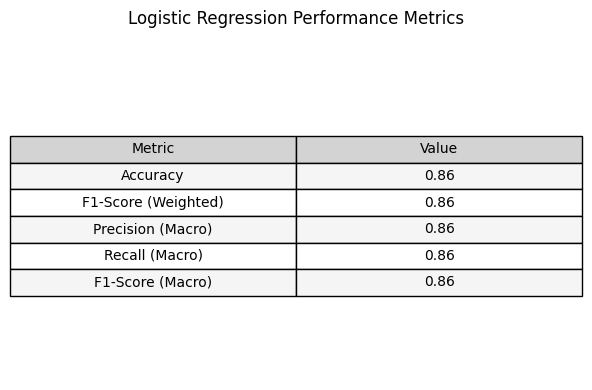


=== Decision Tree ===
Accuracy: 0.82
F1-Score (Weighted): 0.82
Confusion Matrix:
[[21  4]
 [ 5 20]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.81      0.84      0.82        25
           0       0.83      0.80      0.82        25

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.82        50
weighted avg       0.82      0.82      0.82        50

Metrics for Decision Tree exported to decision_tree_metrics.csv


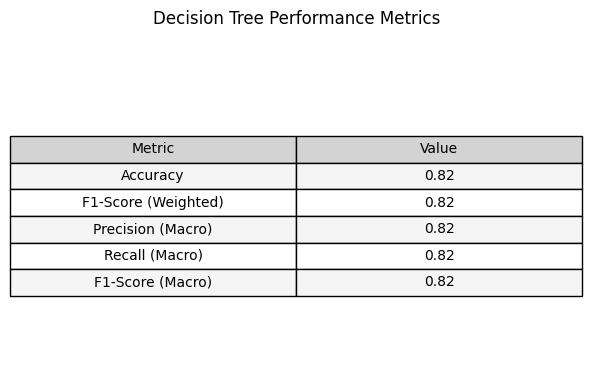


=== Random Forest ===
Accuracy: 0.88
F1-Score (Weighted): 0.88
Confusion Matrix:
[[21  4]
 [ 2 23]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.91      0.84      0.88        25
           0       0.85      0.92      0.88        25

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50

Metrics for Random Forest exported to random_forest_metrics.csv


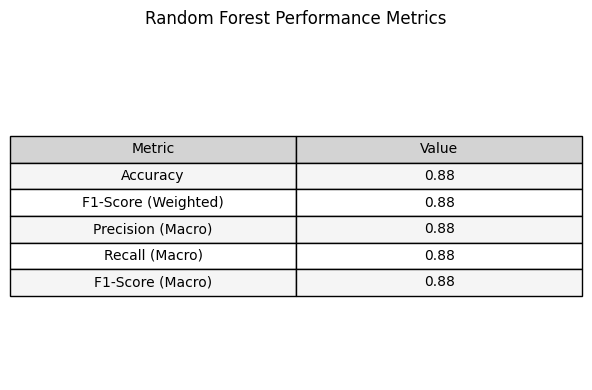

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import os

def validate_data(X_train, y_train, X_test, y_test):
    """Validate input data for classification."""
    # Convert to numpy arrays if pandas DataFrame/Series
    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)

    # Check for emptiness
    if X_train.size == 0 or X_test.size == 0:
        raise ValueError("Training or test feature set is empty.")
    if y_train.size == 0 or y_test.size == 0:
        raise ValueError("Training or test target set is empty.")
    
    # Check feature dimension mismatch
    if X_train.shape[1] != X_test.shape[1]:
        raise ValueError(f"Feature mismatch: X_train has {X_train.shape[1]} features, X_test has {X_test.shape[1]}.")
    
    # Check for unseen classes in test set
    train_classes = np.unique(y_train)
    test_classes = np.unique(y_test)
    if not np.all(np.isin(test_classes, train_classes)):
        print("Warning: Test set contains classes not present in training set.")

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    """Train and evaluate a classification model, returning metrics."""
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1_weighted = f1_score(y_test, y_pred, average='weighted')
        report = classification_report(y_test, y_pred, output_dict=True)

        # Extract macro-average metrics
        macro_precision = report['macro avg']['precision']
        macro_recall = report['macro avg']['recall']
        macro_f1 = report['macro avg']['f1-score']

        # Store results
        result = {
            'Metric': ['Accuracy', 'F1-Score (Weighted)', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)'],
            'Value': [acc, f1_weighted, macro_precision, macro_recall, macro_f1]
        }

        # Print detailed output
        print(f"\n=== {name} ===")
        print(f"Accuracy: {acc:.2f}")
        print(f"F1-Score (Weighted): {f1_weighted:.2f}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        return result, y_pred
    except Exception as e:
        raise RuntimeError(f"Error evaluating {name}: {str(e)}")

def plot_model_table(name, metrics, output_csv):
    """Create and display a table plot for a single model's metrics."""
    # Create DataFrame
    df = pd.DataFrame(metrics)
    df['Value'] = df['Value'].round(2)

    # Export to CSV
    try:
        df.to_csv(output_csv, index=False)
        print(f"Metrics for {name} exported to {output_csv}")
    except Exception as e:
        print(f"Failed to export CSV for {name}: {str(e)}")

    # Create table plot
    plt.figure(figsize=(6, 4))
    ax = plt.gca()
    ax.axis('off')

    # Create table with alternating row colors
    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center',
        loc='center',
        cellColours=[['#f5f5f5' if i % 2 == 0 else '#ffffff' for _ in df.columns] for i in range(len(df))],
        colColours=['#d3d3d3'] * len(df.columns)
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)

    plt.title(f"{name} Performance Metrics", fontsize=12, pad=20)
    plt.tight_layout()
    plt.show()

def main():
    """Main function to evaluate classification models and display per-model tables."""
    # Define classification models
    cls_models = {
        "Logistic Regression": LogisticRegression(max_iter=500),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42)
    }

    # Validate input data
    try:
        validate_data(X_train_cls, y_train_cls, X_test_cls, y_test_cls)
    except NameError:
        raise NameError("Input data (X_train_cls, y_train_cls, X_test_cls, y_test_cls) not defined. Run data preprocessing cells first.")

    # Evaluate models and plot tables
    for name, model in cls_models.items():
        metrics, _ = evaluate_model(name, model, X_train_cls, y_train_cls, X_test_cls, y_test_cls)
        output_csv = f"{name.lower().replace(' ', '_')}_metrics.csv"
        plot_model_table(name, metrics, output_csv)

if __name__ == "__main__":
    main()

In [13]:
# Test Random Forest on a single sample
test_sample = X_test_reg[0].reshape(1, -1)
true_value = y_test_reg.iloc[0]

rf_model = reg_models["Random Forest"]
predicted_value = rf_model.predict(test_sample)[0]

print(f" True PM2.5: {true_value:.2f}")
print(f" Predicted PM2.5: {predicted_value:.2f}")


 True PM2.5: -1.23
 Predicted PM2.5: -0.18


In [14]:
# Redéfinir et entraîner le modèle ici si tu ne veux pas dépendre de `main()`
from sklearn.ensemble import RandomForestClassifier

# Réentraînement local
rf_cls_model = RandomForestClassifier(random_state=42)
rf_cls_model.fit(X_train_cls, y_train_cls)

# Prédiction sur un échantillon
test_sample_cls = X_test_cls[0].reshape(1, -1)
true_label = y_test_cls[0]
predicted_label = rf_cls_model.predict(test_sample_cls)[0]

print(f" True AQI class: {true_label}")
print(f" Predicted AQI class: {predicted_label}")


 True AQI class: -1
 Predicted AQI class: 0


## 📊 Model Evaluation
We'll now evaluate the performance of the models visually.

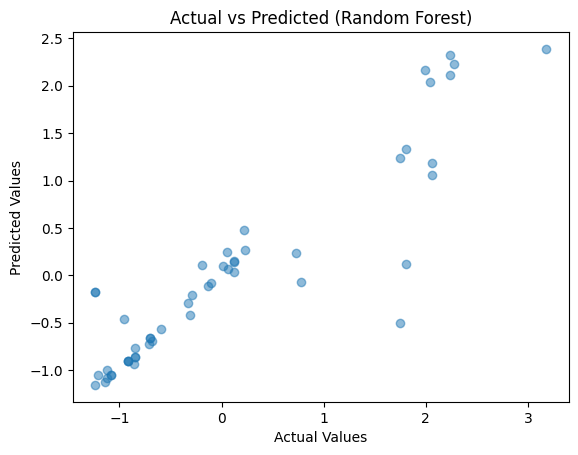

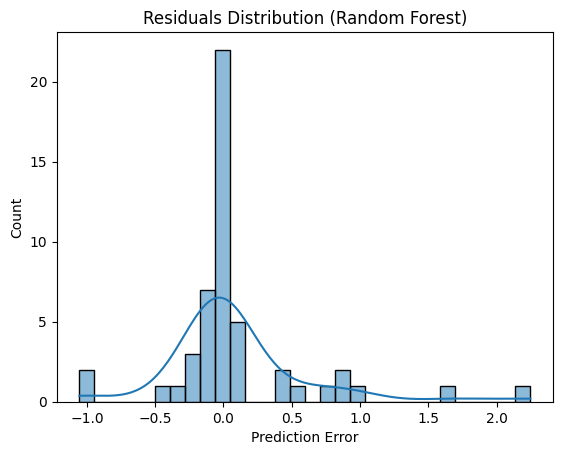

R2 Score: 0.8095228443679583
RMSE: 0.5390644263350373


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
# Example for regression model evaluation
model = reg_models["Random Forest"]  # Specify the model
y_pred = model.predict(X_test_reg)   # Use X_test_reg

# Scatter plot of predictions vs actual
plt.scatter(y_test_reg, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()

# Residual plot
residuals = y_test_reg - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution (Random Forest)")
plt.xlabel("Prediction Error")
plt.show()

# Print metrics
print("R2 Score:", r2_score(y_test_reg, y_pred))
print("RMSE:", mean_squared_error(y_test_reg, y_pred, squared=False))

DataFrame loaded successfully.
DataFrame columns: ['city', 'timestamp', 'pm2.5', 'aqi', 'temperature', 'humidity', 'pressure', 'wind_speed']


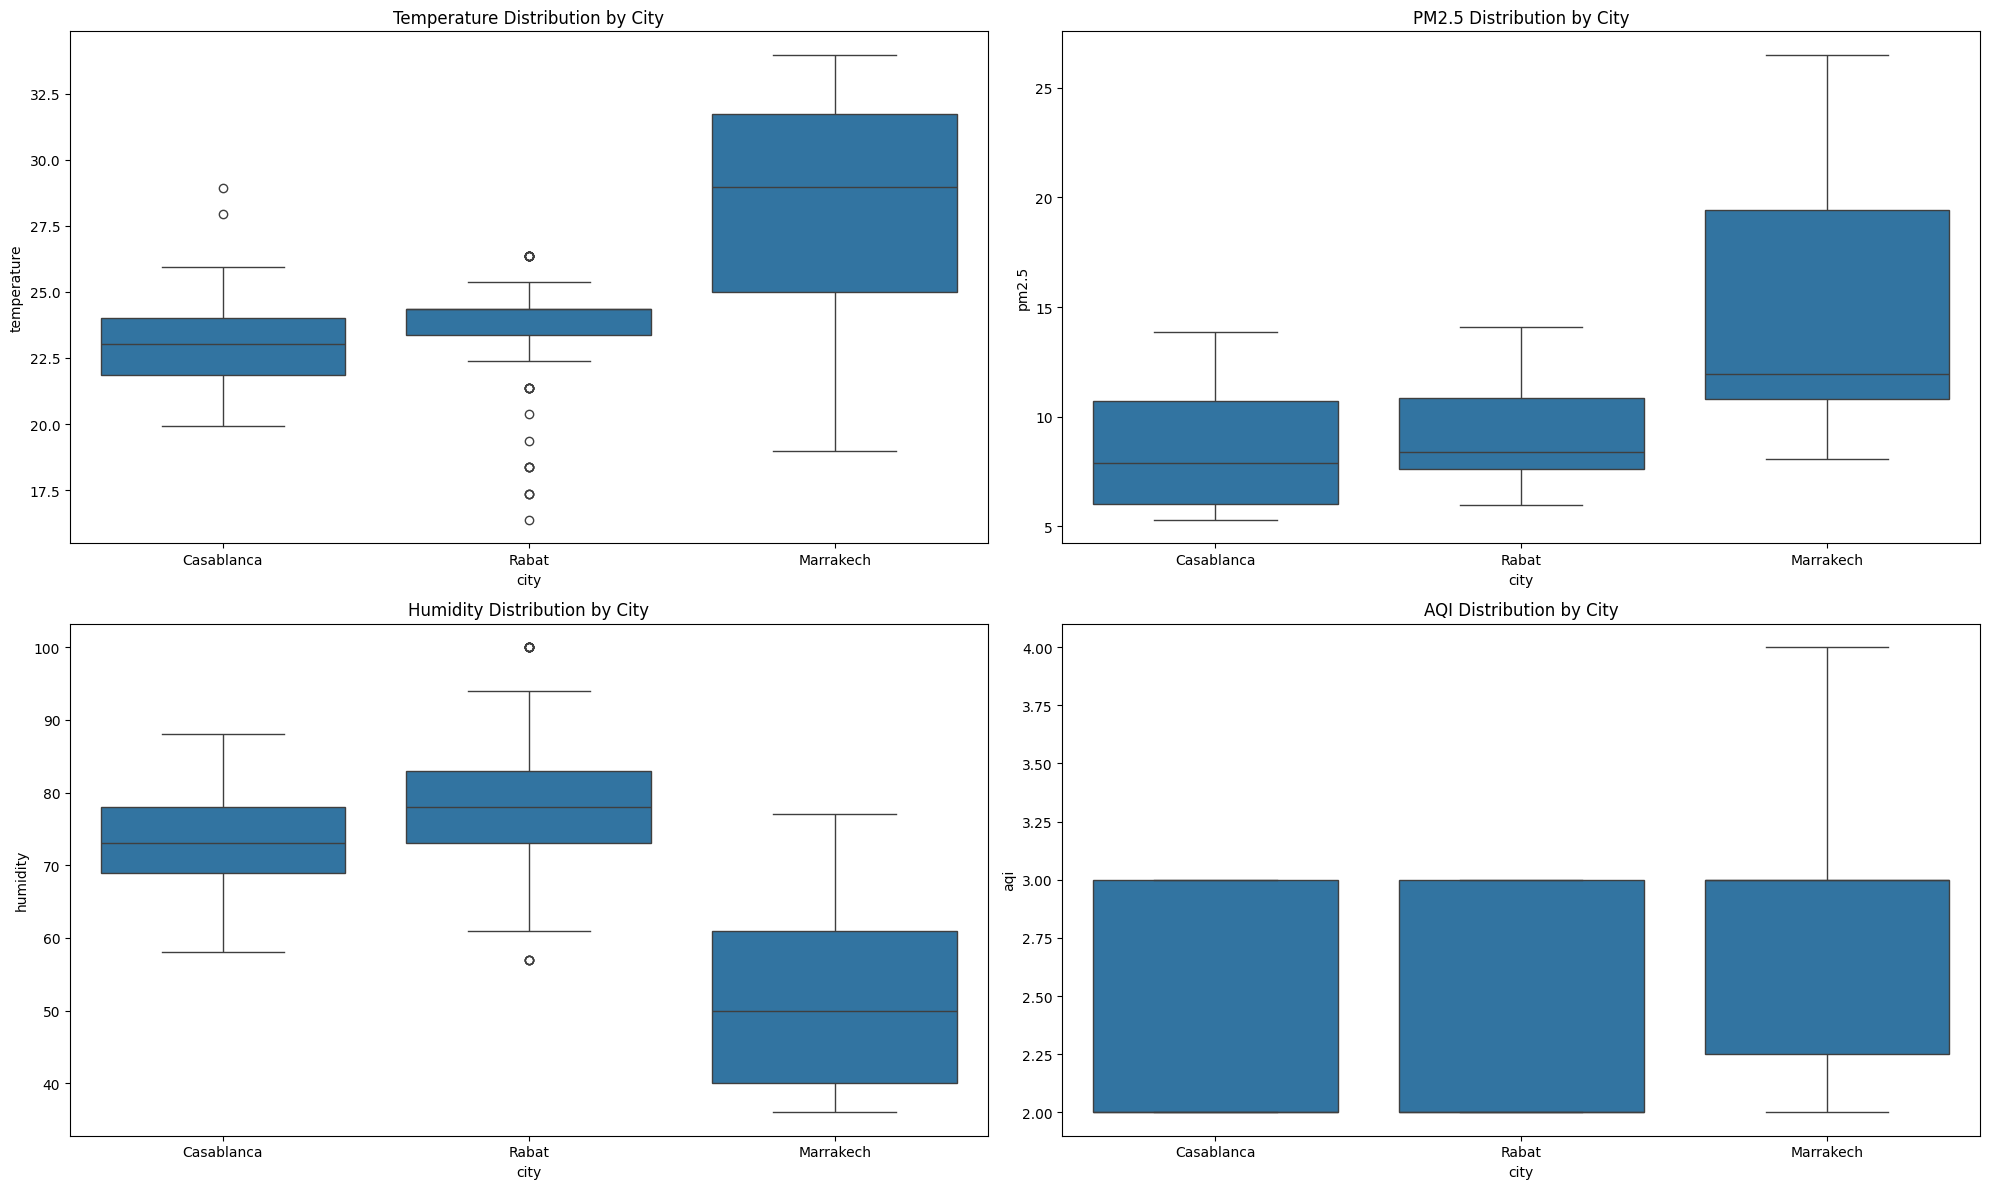

In [16]:
# Reload the original DataFrame
try:
    df = pd.read_csv("../data/air_quality_data.csv")
    print("DataFrame loaded successfully.")
except FileNotFoundError:
    raise FileNotFoundError("Could not find '../data/air_quality_data.csv'. Please verify the file path.")

# Print column names for debugging
print("DataFrame columns:", df.columns.tolist())

# Verify required columns
required_columns = ['city', 'temperature', 'pm2.5', 'humidity', 'aqi']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"DataFrame is missing the following required columns: {missing_columns}")

# Visualize data
plt.figure(figsize=(20, 12))

# Plot 1: Temperature distribution
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='city', y='temperature')
plt.title('Temperature Distribution by City')

# Plot 2: PM2.5 distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='city', y='pm2.5')
plt.title('PM2.5 Distribution by City')

# Plot 3: Humidity distribution
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='city', y='humidity')
plt.title('Humidity Distribution by City')

# Plot 4: AQI distribution
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='city', y='aqi')
plt.title('AQI Distribution by City')

plt.tight_layout()
plt.show()